<a href="https://colab.research.google.com/github/KwonYN/TIL/blob/master/PYTHON/TENSORFLOW/Ch3_%EC%98%88%EC%A0%9C_10_Logistic_Regression_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter3-3. Deep Learning 기초 : Logistic Regression

>## [예제3-10] Logostic Regression (Python)

>### Load modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt

print("Module Loaded.")
print("NumPy Version :{}".format(np.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

Module Loaded.
NumPy Version :1.17.4
Matplotlib Version :3.1.1


> ### Input and Label

In [0]:
# Logistic regression : Binary Classification data  (p.158)
x_input = np.array([[1, 1], [2, 1], [1, 2], [0.5, 4], [4, 1], [2.5, 2.3]])
labels = np.array([0, 0, 0, 1, 1, 1])

>### Activation Function : Sigmoid Function
>$\sigma(x) = \frac{1}{1+e^{-x}}$
>### Hypothesis : Logistic Equation
>### $H(x) = \sigma(XW + b$)

In [13]:
# Weight, Bias
w = np.random.normal(size=(2,))
b = np.random.normal()

# 활성 함수(Activate Function) : Sigmoid Function
def Sigmoid(x: float or np.ndarray)->float or np.ndarray:
    return 1 / (1+np.exp(-x))


# 가설(Hypothesis)
def Hypothesis(x: float or np.ndarray)->float or np.ndarray:
    return Sigmoid(np.matmul(x, w) + b)


print(Hypothesis(x_input).shape)  # input을 가설에 넣었을 때 결과의 shape이 궁금해서..

(6,)


>### Cost Function : Cross Entropy Error
>### $cost(W,b) = \frac{1}{m}\sum_{i=1}^{m}t\log{H(x_{i}})+(1-t)\log{(1-H(x_{i}}))$

In [17]:
# Cost Function : Cross Entropy Error - 실제 결과와 가설이 계산한 확률이 얼마나 차이가 나는지!
def Cost(x: float or np.ndarray, t: float or np.ndarray)->float:
    h = Hypothesis(x)
    return -np.mean( t * np.log(h) + (1-t) * np.log(1-h) )


print( Cost(x_input, labels).shape )  # 결과값은 스칼라 값

()


>### Gradient
>### $\frac{d}{dx}f(x) = \lim_{\delta = 0} \frac{f(x+\delta) - f(x-\delta)}{2\delta}$

In [0]:
def Gradient(x: float or np.ndarray, t: float or np.ndarray)->tuple:
    global w, b
    pres_w = w.copy()
    grad_w = np.zeros_like(w)
    delta = 1e-7

    for idx in range(w.size):
        w[idx] = pres_w[idx] + delta
        cost_p = Cost(x, t)
        w[idx] = pres_w[idx] - delta
        cost_m = Cost(x, t)
        grad_w[idx] = (cost_p-cost_m)/(2*delta)
        w[idx] = pres_w[idx]


    pres_b = b

    b = pres_b + delta
    cost_p = Cost(x, t)
    b = pres_b - delta
    cost_m = Cost(x, t)
    grad_b = (cost_p-cost_m)/(2*delta)
    
    b = pres_b

    return grad_w, grad_b

>### 학습 준비 과정

In [10]:
N_training = 100000
training_idx = np.arange(0, N_training+1, 1)
cost_graph = np.zeros(N_training+1)

cost_graph[0] = Cost(x_input, labels)
print("[{:>5}] cost = {:>10.4}, w = [{:>7.4} {:>7.4}], b = {:>7.4}".format(0, cost_graph[0], w[0], w[1], b))

check = np.array([0, 1000, 8000, 20000, 40000, N_training])
w_trained = []
b_trained = []
w_trained.append(w)
b_trained.append(b)
check_idx = 1

[    0] cost =      1.104, w = [ -0.778   1.662], b =  0.1733


>### Training
>### $\mu$ : Learning rate
>### $W = W - \mu\frac{\partial}{\partial W}cost(W, b)$
>### $b = b - \mu\frac{\partial}{\partial b}cost(W, b)$

In [11]:
# 학습 (Training)
learning_rate = 0.01
for cnt_training in range(1, N_training+1):
    cost_graph[cnt_training] = Cost(x_input, labels)
    grad_w, grad_b = Gradient(x_input, labels)
    w -= learning_rate * grad_w
    b -= learning_rate * grad_b
    if check[check_idx] == cnt_training:
        w_trained.append(w)
        b_trained.append(b)
        check_idx += 1
    if cnt_training % 1000 == 0:
        print("[{:>5}] cost = {:>10.4}, w = [{:>7.4} {:>7.4}], b = {:>7.4}".format(cnt_training, cost_graph[cnt_training], w[0], w[1], b))


[ 1000] cost =     0.5223, w = [ 0.3335  0.4899], b =  -1.122
[ 2000] cost =     0.4329, w = [ 0.5792  0.6953], b =  -2.009
[ 3000] cost =     0.3682, w = [ 0.7608  0.9003], b =  -2.764
[ 4000] cost =     0.3196, w = [ 0.9178   1.079], b =  -3.419
[ 5000] cost =     0.2822, w = [  1.056   1.235], b =  -3.994
[ 6000] cost =     0.2524, w = [  1.179   1.375], b =  -4.506
[ 7000] cost =     0.2283, w = [   1.29     1.5], b =  -4.967
[ 8000] cost =     0.2084, w = [  1.391   1.614], b =  -5.387
[ 9000] cost =     0.1916, w = [  1.483   1.719], b =  -5.772
[10000] cost =     0.1773, w = [  1.568   1.815], b =  -6.127
[11000] cost =      0.165, w = [  1.647   1.905], b =  -6.457
[12000] cost =     0.1543, w = [  1.721   1.988], b =  -6.765
[13000] cost =     0.1448, w = [   1.79   2.067], b =  -7.054
[14000] cost =     0.1365, w = [  1.856    2.14], b =  -7.326
[15000] cost =      0.129, w = [  1.917    2.21], b =  -7.582
[16000] cost =     0.1224, w = [  1.976   2.276], b =  -7.825
[17000] 

>### Plotting

[Training Test]
Input [1. 1.] , Target : 0 => Y : 0 (y:0.00066)
Input [2. 1.] , Target : 0 => Y : 0 (y:0.029)
Input [1. 2.] , Target : 0 => Y : 0 (y:0.049)
Input [0.5 4. ] , Target : 1 => Y : 1 (y: 0.98)
Input [4. 1.] , Target : 1 => Y : 1 (y: 0.98)
Input [2.5 2.3] , Target : 1 => Y : 1 (y: 0.98)


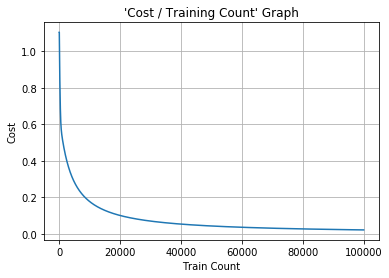

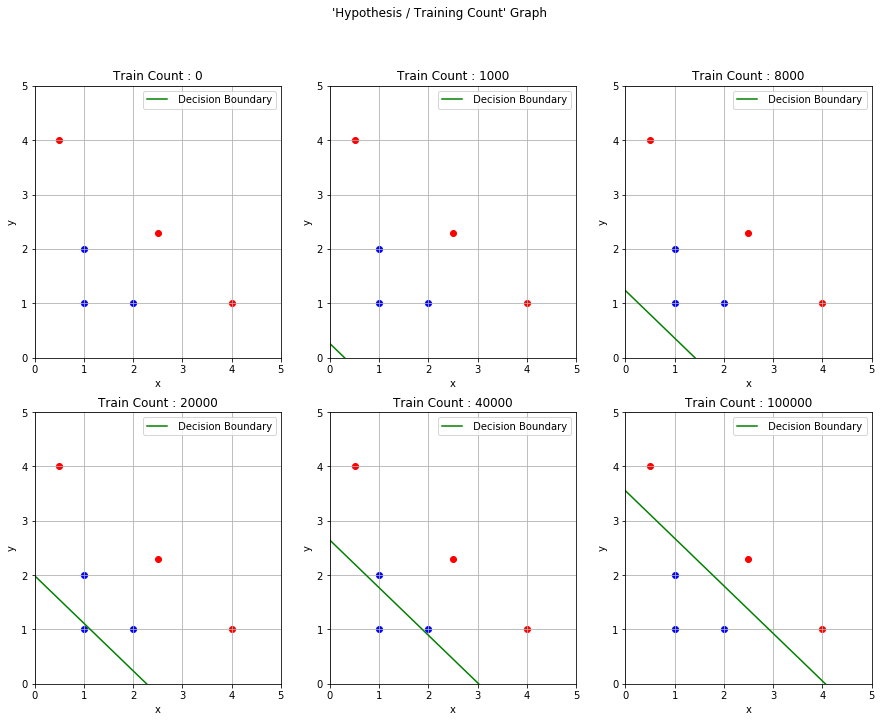

In [19]:
# Training 상황에 대한 그래프 출력
print("[Training Test]")
y = Hypothesis(x_input)
Y = [int(y_elem>0.5) for y_elem in y] # list comprehension
for idx in range(x_input.shape[0]):
    print("Input {} , Target : {} => Y :{:>2} (y:{:>5.2})".format(x_input[idx], labels[idx], Y[idx], y[idx]))


# Training 상황에 대한 그래프 출력 - 1개
# 1)Training 회수 별 Cost 값  : 트레이닝 횟수가 증가할 수록 Cost값도 점점 감소 ( 초반에는 가파르게 감소하다가, 이후에는 아주 완만 )
fig_cost, ax_cost = plt.subplots()
ax_cost.plot(training_idx, cost_graph)
ax_cost.set_title("'Cost / Training Count' Graph")
ax_cost.set_xlabel("Train Count")
ax_cost.set_ylabel("Cost")
ax_cost.grid(True)


# 2) 구분선 그려넣을 계획 - 6개
x_decision = np.linspace(0, 5, 1000)
x_col = x_input[:, 0]
x_row = x_input[:, 1]
fig_hypothesis, ax_hypothesis = plt.subplots(2, 3, figsize=(15, 11))
fig_hypothesis.suptitle("'Hypothesis / Training Count' Graph")
for ax_idx in range(check.size):
    w = w_trained[ax_idx]
    b = b_trained[ax_idx]
    y_decision = -(w[0] * x_decision + b)/w[1] 
    ax_hypothesis[ax_idx // 3][ax_idx % 3].scatter(x_col[:3], x_row[:3], color='blue')
    ax_hypothesis[ax_idx // 3][ax_idx % 3].scatter(x_col[3:], x_row[3:], color='red')
    ax_hypothesis[ax_idx // 3][ax_idx % 3].plot(x_decision, y_decision, label=' Decision Boundary', color='green')

    ax_hypothesis[ax_idx // 3][ax_idx % 3].set_title("Train Count : {}".format(check[ax_idx]))
    ax_hypothesis[ax_idx // 3][ax_idx % 3].set_xlim((0, 5))
    ax_hypothesis[ax_idx // 3][ax_idx % 3].set_ylim((0, 5))
    ax_hypothesis[ax_idx // 3][ax_idx % 3].set_xlabel("x")
    ax_hypothesis[ax_idx // 3][ax_idx % 3].set_ylabel("y")
    ax_hypothesis[ax_idx // 3][ax_idx % 3].grid(True)
    ax_hypothesis[ax_idx // 3][ax_idx % 3].legend()

plt.show()